# Кузьмин Д. Ю. М80-304Б

#   <center>Лабораторная работа №1</center>

##   <center>Первый датасет</center>

### Выбираем датасет

Датасет взят с сайта *Kaggle*: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

### Описание данных

**Цель:** Проанализировать и подготовит данные из датасета для решения задачи бинарной классификации  с целью определения значения целевой переменной-стобца - *RainTomorrow*

**Содержание:** Датасет содержит данные о погоде из различных метостанций Австралии. Полное описание колонок датасета можно найти перейдя по ссылке выше.

**Дополнительное указание:** Необходимо удалить колонку *RISK_MM*, поскольку она непосредственно влияет на целевую переменную и добавлена для использования датасета в целях решения задачи регрессии.

### Импортируем необходимые библиотеки

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler 

import warnings

from tqdm import tqdm

from pandas.plotting import scatter_matrix


warnings.filterwarnings("ignore")

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (18,8)

### Импортируем данные

Импортируем датасет и сразу удаляем колонку *RISK_MM* согласно указанию, полученному к датасету.

In [2]:
HOUSING_PATH = "data/" 
def load_weather_data(housing_path=HOUSING_PATH):    
    csv_path = os.path.join(housing_path, "weatherAUS.csv")   
    return pd.read_csv(csv_path).drop("RISK_MM", axis = 1)

In [3]:
weather_df = load_weather_data()

print("Размер датасета:", weather_df.shape)

weather_df.head()

Размер датасета: (142193, 23)


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

### Посмотрим на содержание датасета

Получим полный список колонок  в датасете c информацией:

In [4]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Обратим внимание на то, что *object* колонки имеют большой вес, что можно будет оптимизировать для экономии ресурсов при вычислении.

In [5]:
for dtype in ['float','int','object']:
    selected_dtype = weather_df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 1.02 MB
Average memory usage for int columns: 0.00 MB
Average memory usage for object columns: 7.29 MB


Из описания можем увидеть, что имеются нечисловые колонки, с которыми придется работать. Нечисловой является и целевая переменная.

Также почти во всех колонках имеются пропуски в данных, которые необходимо заполнить.

In [6]:
weather_df.describe(include="all")

Date  Location        MinTemp        MaxTemp       Rainfall  \
count       142193    142193  141556.000000  141871.000000  140787.000000   
unique        3436        49            NaN            NaN            NaN   
top     2013-09-04  Canberra            NaN            NaN            NaN   
freq            49      3418            NaN            NaN            NaN   
mean           NaN       NaN      12.186400      23.226784       2.349974   
std            NaN       NaN       6.403283       7.117618       8.465173   
min            NaN       NaN      -8.500000      -4.800000       0.000000   
25%            NaN       NaN       7.600000      17.900000       0.000000   
50%            NaN       NaN      12.000000      22.600000       0.000000   
75%            NaN       NaN      16.800000      28.200000       0.800000   
max            NaN       NaN      33.900000      48.100000     371.000000   

         Evaporation      Sunshine WindGustDir  WindGustSpeed WindDir9am  ...  \
count   81350.000000  74377.000000      132863  132923.000000     132180  ...   
unique           NaN           NaN          16            NaN         16  ...   
top              NaN           NaN           W            NaN          N  ...   
freq             NaN           NaN        9780            NaN      11393  ...   
mean        5.469824      7.624853         NaN      39.984292        NaN  ...   
std         4.188537      3.781525         NaN      13.588801        NaN  ...   
min         0.000000      0.000000         NaN       6.000000        NaN  ...   
25%         2.600000      4.900000         NaN      31.000000        NaN  ...   
50%         4.800000      8.500000         NaN      39.000000        NaN  ...   
75%         7.400000     10.600000         NaN      48.000000        NaN  ...   
max       145.000000     14.500000         NaN     135.000000        NaN  ...   

          Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count   140419.000000  138583.000000  128179.000000  128212.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        68.843810      51.482606    1017.653758    1015.258204   
std         19.051293      20.797772       7.105476       7.036677   
min          0.000000       0.000000     980.500000     977.100000   
25%         57.000000      37.000000    1012.900000    1010.400000   
50%         70.000000      52.000000    1017.600000    1015.200000   
75%         83.000000      66.000000    1022.400000    1020.000000   
max        100.000000     100.000000    1041.000000    1039.600000   

            Cloud9am      Cloud3pm        Temp9am        Temp3pm  RainToday  \
count   88536.000000  85099.000000  141289.000000  139467.000000     140787   
unique           NaN           NaN            NaN            NaN          2   
top              NaN           NaN            NaN            NaN         No   
freq             NaN           NaN            NaN            NaN     109332   
mean        4.437189      4.503167      16.987509      21.687235        NaN   
std         2.887016      2.720633       6.492838       6.937594        NaN   
min         0.000000      0.000000      -7.200000      -5.400000        NaN   
25%         1.000000      2.000000      12.300000      16.600000        NaN   
50%         5.000000      5.000000      16.700000      21.100000        NaN   
75%         7.000000      7.000000      21.600000      26.400000        NaN   
max         9.000000      9.000000      40.200000      46.700000        NaN   

        RainTomorrow  
count         142193  
unique             2  
top               No  
freq          110316  
mean             NaN  
std              NaN  
min              NaN  
25%              NaN  
50%              NaN  
75%              NaN  
max              NaN  

[11 rows x 23 columns]

### Разберемся с нечисловыми колонками

Колонки *RainToday* и *RainTomorrow* могут принимать значения **Yes** и **No**, что удобно преобразовать в классические для бинарной классификации числовые значения **0** и **1**.

In [7]:
weather_df.RainToday.unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
weather_df.RainTomorrow.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
weather_df.loc[weather_df.RainToday == "No", "RainToday"] = 0
weather_df.loc[weather_df.RainToday == "Yes", "RainToday"] = 1

weather_df.loc[weather_df.RainTomorrow == "No", "RainTomorrow"] = 0
weather_df.loc[weather_df.RainTomorrow == "Yes", "RainTomorrow"] = 1

In [10]:
weather_df.RainToday.unique()

array([0, 1, nan], dtype=object)

In [11]:
weather_df.RainTomorrow.unique()

array([0, 1], dtype=object)

Имеет смысл разложить дату на три колонки: *Year*, *Mounth*, *Day*. Это будет удобно при группировке для заполнения пропусков.

In [12]:
date_seria = weather_df.Date.str.split(pat = '-')
weather_df['Year'] = date_seria.str[0].astype('int32')
weather_df['Mounth'] = date_seria.str[1].astype('int32')
weather_df['Day'] = date_seria.str[2].astype('int32')

Саму же колонку *Date* удалим из датасета.

In [13]:
weather_df.drop('Date', axis = 1, inplace = True)

Оставшиеся нечисловые колонки - *Location*, *WindGustDir*, *WindDir9am*, *WindDir3pm*. Значения в них не связаны отношением порядка, поэтому интерпретировать их как число с помощью **LabelEncoding** неверно. Поэтому применим к ним **OneHotEncoding**.

Однако перед этим мы должны заполнить пропуски в этих колонках, поэтому вернемся к этому позже.

### Посмотрим на зависимости между данными

Перед тем как перейти к анализу зависимостей, нужно перевести колонки *RainToday* и *RainTomorrow* в числовой тип, поэтому здесь заранее заполним пропуск в данных колонки *RainToday* до того, как мы начнем избавляться от пропусков в остальных столбцах.

Самый очевидный способ восполнить информацию в колонке *RainToday* о прошедшем дожде - посмотреть информацию о дожде в колонке *RainTomorrow* для предыдущего дня по той же локации.

Это легко сделать, поскольку датасет отсортирован по местоположениям и датам.

In [14]:
def fill_value(i, dataset):
    dataset.loc[i, "RainToday"] = dataset['RainTomorrow'].iloc[i - 1]

for i, _ in weather_df[weather_df.RainToday.isnull()].iterrows():
    fill_value(i, weather_df)

In [15]:
weather_df.RainTomorrow = weather_df.RainTomorrow.astype('int8')
weather_df.RainToday = weather_df.RainToday.astype('int8')

Посмотрим на отношение количества дней когда был дождь к количеству дней когда его не было по целевой переменной для разных месяцев.

Обратим внимание на то, что количество дождливых дней растет к лету.

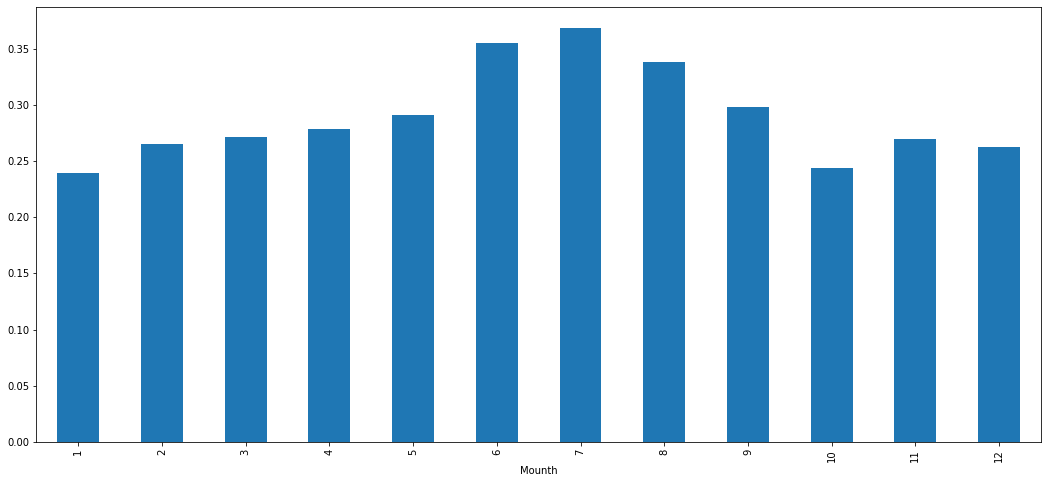

In [16]:
rain_series = weather_df.groupby('Mounth')["RainTomorrow"].sum() / \
    (weather_df.groupby('Mounth')["RainTomorrow"].count() - (weather_df.groupby('Mounth')["RainTomorrow"].sum()))
    

rain_series.plot.bar()

Также интересно обратить внимание на кореляции между данными.

Мы не преобразовали еще тип целевой колонки из *object* в числовой тип данных, поэтому не можем посмотреть на его корреляцию, однако можем оценить признаки, в группе с которыми следует заплнять пропуски в данных.

Мы видим, что температура поднимается ближе ко дню, и поэтому максимальная температура сильно скоррелирована с температурой в 3pm.

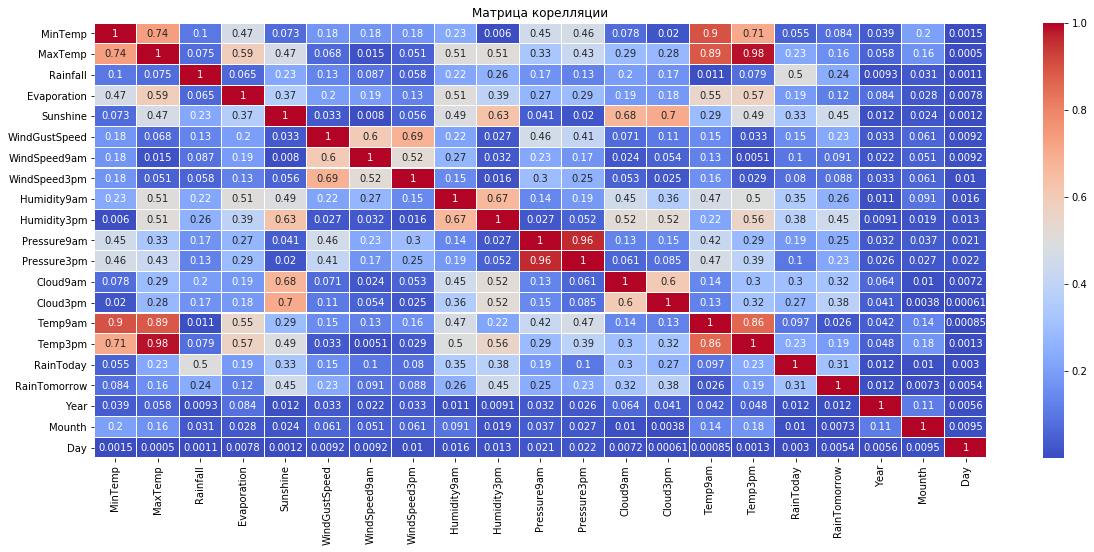

In [17]:
fi = plt.figure(figsize= (20, 8))
ax1 = fi.add_subplot()
ax1.set_title('Матрица корелляции')
sns.heatmap(weather_df.corr().abs(), annot=True, cmap = "coolwarm", linewidth = 0.1, ax = ax1)

Информативно будет посмотреть на то как распределены пропуски в данных по колонкам

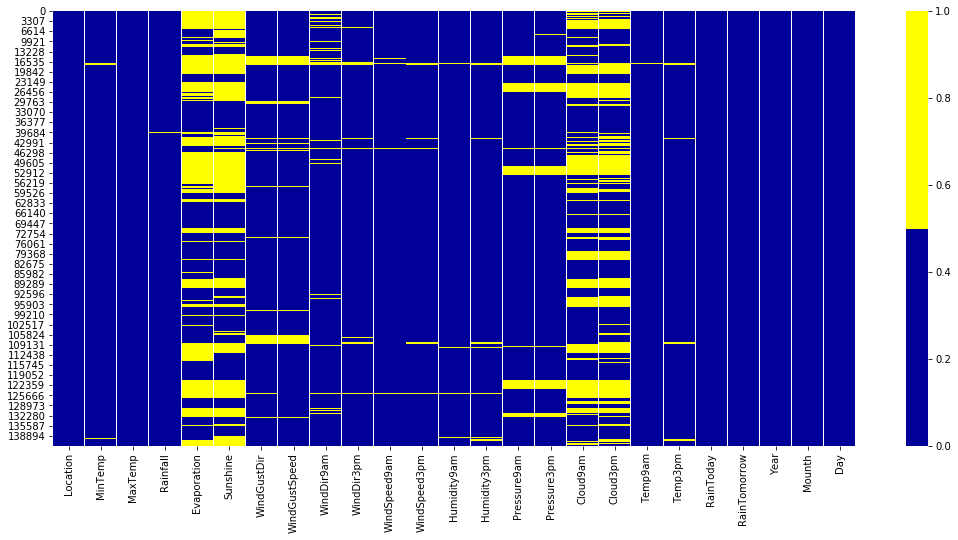

In [18]:
cols = weather_df.columns

colours = ['#000099', '#ffff00'] 
sns.heatmap(weather_df[cols].isnull(), cmap=sns.color_palette(colours))

### Разберемся с выбросами

Взглянув на описание данных, можно заметить, что в колонке *Rainfall* максимальное значение сильно больше 3-ей квартили, что сигнализирует о выбросе.

Посмотрим на него на графике.


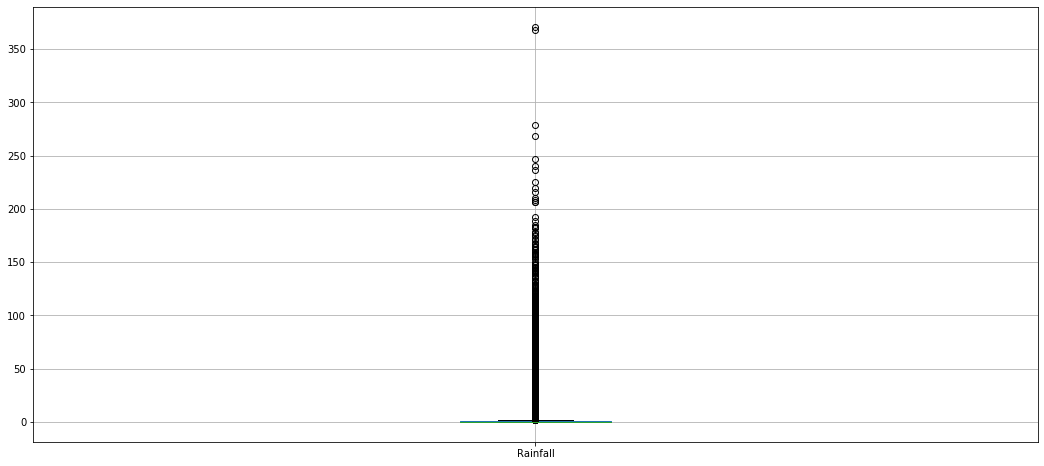

In [19]:
weather_df.boxplot(column=['Rainfall'])

Немного более ясную картину можно увидеть на "ящике с усами", где точками помечены выбросы.

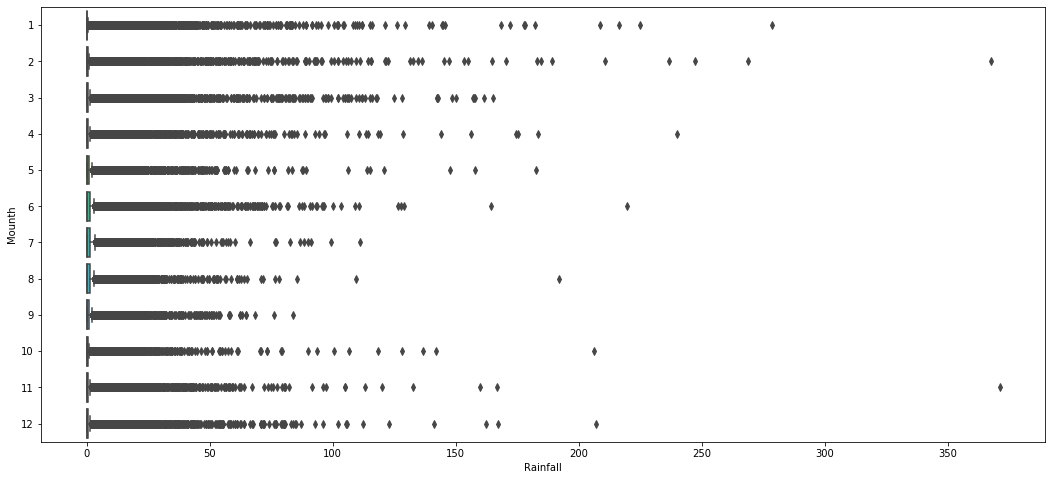

In [20]:
sns.boxplot(y="Mounth", x="Rainfall", data=weather_df, orient="h")

Оценим количество наблюдений со значением *Rainfall* больше 200.

In [21]:
rubish_data = weather_df[weather_df.Rainfall > 200.0]
print("Количество данных со значением Rainfall больше 200:", rubish_data.shape[0])

Количество данных со значением Rainfall больше 200: 14


Удалим выбросные значения из датасета. За выброс будем считать наблюдения со значением больше 50, поскольку такие значения аномальны и могут иметь негативное влияние на классификатор.

In [22]:
weather_df.drop(weather_df[weather_df.Rainfall > 50.0].index, axis = 0, inplace = True)
weather_df.reset_index(drop = True, inplace = True)

### Заполним пропуски в данных

Для наблюдений в которых пропущена максимальная температура, но при этом есть данные по дневной температуре заполним пропуски дневным значением, а для минимальной температуры заполним утренним.

Тоже самое сделаем и с в обратную сторону для утреннего и дневного значения на основе максимального и минимального.

К сожалению, таких пересечений оказалось немного.

In [23]:
weather_df.loc[weather_df.MaxTemp.isnull(), "MaxTemp"] = weather_df.Temp3pm[weather_df.MaxTemp.isnull()]
weather_df.loc[weather_df.MinTemp.isnull(), "MinTemp"] = weather_df.Temp9am[weather_df.MinTemp.isnull()]

weather_df.loc[weather_df.Temp3pm.isnull(), "Temp3pm"] = weather_df.MaxTemp[weather_df.MaxTemp.isnull()]
weather_df.loc[weather_df.Temp9am.isnull(), "Temp9am"] = weather_df.MinTemp[weather_df.MinTemp.isnull()]

weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141407 entries, 0 to 141406
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       141407 non-null  object 
 1   MinTemp        141052 non-null  float64
 2   MaxTemp        141231 non-null  float64
 3   Rainfall       140001 non-null  float64
 4   Evaporation    81101 non-null   float64
 5   Sunshine       73914 non-null   float64
 6   WindGustDir    132125 non-null  object 
 7   WindGustSpeed  132185 non-null  float64
 8   WindDir9am     131433 non-null  object 
 9   WindDir3pm     137653 non-null  object 
 10  WindSpeed9am   140070 non-null  float64
 11  WindSpeed3pm   138796 non-null  float64
 12  Humidity9am    139644 non-null  float64
 13  Humidity3pm    137828 non-null  float64
 14  Pressure9am    127460 non-null  float64
 15  Pressure3pm    127493 non-null  float64
 16  Cloud9am       87929 non-null   float64
 17  Cloud3pm       84518 non-null

Оставшиеся пропуски заполним медианой по группе из местоположения и месяца и информации о том, был ли в этот день дождь, в которой находится запись. В более серьезном проекте следовало бы составить группы по более мелкому временному разбиению, а при нахождении  скорости ветра учитывать его направление.

К сожалению, я не смог найти встроенной функции **Pandas** для этого, поэтому пришлось писать свои.

Долгая версия(первый вариант):

In [24]:
#def mean_inputer(dataset, col, means):
#    for i, row in dataset[dataset[col].isnull()].iterrows():
#        dataset[col].iloc[i] = means.loc[(row['Mounth'], row['Location'], row['RainToday'])][col]

In [25]:
#indexes = ["MinTemp", "MaxTemp", "Temp9am", "Temp3pm", "Pressure3pm", \
#    "Pressure9am", "Cloud9am", "Cloud3pm", "Humidity9am", "Humidity3pm", \
#    "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Rainfall", "Evaporation", "Sunshine"]
#mean_values = weather_df.groupby(["Mounth", "Location", "RainToday"])[indexes].median()

In [26]:
#for idx in indexes:
#    mean_inputer(weather_df, idx, mean_values)
    
#weather_df.describe()

Ускоренная версия(второй вариант):

Все равно работает долго :(

In [27]:
def to_apply_inputer_creator(means, col):
    def to_apply(x):
        return means.loc[(x['Mounth'], x['Location'], x['RainToday'])][col]
    return to_apply

In [28]:
indexes = ["MinTemp", "MaxTemp", "Temp9am", "Temp3pm", "Pressure3pm", \
    "Pressure9am", "Cloud9am", "Cloud3pm", "Humidity9am", "Humidity3pm", \
    "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Rainfall", "Evaporation", "Sunshine"]

mean_values = weather_df.groupby(["Mounth", "Location", "RainToday"])[indexes].median()
mean_values.head()

MinTemp  MaxTemp  Temp9am  Temp3pm  Pressure3pm  \
Mounth Location RainToday                                                    
1      Adelaide 0             17.1    31.30     22.0    29.50      1012.20   
                1             17.0    23.40     18.7    21.50      1010.40   
       Albany   0             17.0    23.00     20.2    21.50      1014.00   
                1             17.4    20.95     18.7    20.15      1012.10   
       Albury   0             16.7    33.60     23.3    31.75      1010.05   

                           Pressure9am  Cloud9am  Cloud3pm  Humidity9am  \
Mounth Location RainToday                                                 
1      Adelaide 0               1013.8       NaN       NaN         46.0   
                1               1010.5       NaN       NaN         73.0   
       Albany   0               1015.7       6.0       4.0         68.0   
                1               1012.5       8.0       5.5         83.0   
       Albury   0               1013.0       5.5       3.0         50.0   

                           Humidity3pm  WindGustSpeed  WindSpeed9am  \
Mounth Location RainToday                                             
1      Adelaide 0                 28.0           37.0           9.0   
                1                 50.0           41.0          13.0   
       Albany   0                 70.0            NaN          15.0   
                1                 67.0            NaN          17.0   
       Albury   0                 25.0           37.0           9.0   

                           WindSpeed3pm  Rainfall  Evaporation  Sunshine  
Mounth Location RainToday                                                 
1      Adelaide 0                  15.0       0.0          8.8     12.70  
                1                  17.0       6.4          5.0      7.60  
       Albany   0                  23.0       0.0          7.4      9.95  
                1                  24.0       3.0          6.1      6.90  
       Albury   0                  15.0       0.0          NaN       NaN

In [29]:
for idx in tqdm(indexes):
    func = to_apply_inputer_creator(mean_values, idx)
    if weather_df[idx].isnull().sum():
        weather_df.loc[weather_df[idx].isnull(), idx] = weather_df[weather_df[idx].isnull()].apply(func, axis = 1)

100%|██████████| 16/16 [05:48<00:00, 21.76s/it]


К сожалению, не все значения удалось заполнить по группам, так как некоторые группы не имеют числовых значений.

In [30]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141407 entries, 0 to 141406
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       141407 non-null  object 
 1   MinTemp        141407 non-null  float64
 2   MaxTemp        141407 non-null  float64
 3   Rainfall       141407 non-null  float64
 4   Evaporation    96150 non-null   float64
 5   Sunshine       89578 non-null   float64
 6   WindGustDir    132125 non-null  object 
 7   WindGustSpeed  135460 non-null  float64
 8   WindDir9am     131433 non-null  object 
 9   WindDir3pm     137653 non-null  object 
 10  WindSpeed9am   141407 non-null  float64
 11  WindSpeed3pm   141407 non-null  float64
 12  Humidity9am    141407 non-null  float64
 13  Humidity3pm    141401 non-null  float64
 14  Pressure9am    129680 non-null  float64
 15  Pressure3pm    129680 non-null  float64
 16  Cloud9am       107516 non-null  float64
 17  Cloud3pm       107509 non-nul

Сделаем еще одну попытку заполнить **Nan** значения с использованием группировки, но теперь по столбцу *RainToday*.

In [31]:
indexes = ["Evaporation", "Sunshine", "WindGustSpeed", "Pressure9am", "Pressure3pm", \
           "Cloud9am", "Cloud3pm", "Temp3pm", "Humidity3pm"]
for idx in indexes:
    weather_df.loc[weather_df[idx].isnull() & (weather_df.RainToday == 0), idx] = \
        weather_df[idx][weather_df.RainToday == 0].median()
    weather_df.loc[weather_df[idx].isnull() & (weather_df.RainToday == 1), idx] = \
        weather_df[idx][weather_df.RainToday == 1].median()

Для колонок с нечисловыми значениями принцип заполнения пропусков такой же, но заполнять будем неаиболее часто встречающимся значениями.

In [32]:
indexes = ["WindDir9am", "WindGustDir", "WindDir3pm"]
for idx in indexes:
    weather_df.loc[weather_df[idx].isnull() & (weather_df.RainToday == 0), idx] = \
        weather_df[idx][weather_df.RainToday == 0].describe()['top']
    weather_df.loc[weather_df[idx].isnull() & (weather_df.RainToday == 1), idx] = \
        weather_df[idx][weather_df.RainToday == 1].describe()['top']

Как видим все пропуски в данных заполнены.

In [33]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141407 entries, 0 to 141406
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       141407 non-null  object 
 1   MinTemp        141407 non-null  float64
 2   MaxTemp        141407 non-null  float64
 3   Rainfall       141407 non-null  float64
 4   Evaporation    141407 non-null  float64
 5   Sunshine       141407 non-null  float64
 6   WindGustDir    141407 non-null  object 
 7   WindGustSpeed  141407 non-null  float64
 8   WindDir9am     141407 non-null  object 
 9   WindDir3pm     141407 non-null  object 
 10  WindSpeed9am   141407 non-null  float64
 11  WindSpeed3pm   141407 non-null  float64
 12  Humidity9am    141407 non-null  float64
 13  Humidity3pm    141407 non-null  float64
 14  Pressure9am    141407 non-null  float64
 15  Pressure3pm    141407 non-null  float64
 16  Cloud9am       141407 non-null  float64
 17  Cloud3pm       141407 non-nul

### OneHotEncoding

Как и было обещано выше, мы возвращаемся к преобразованию нечисловых признаков в числовой вид.

Количество уникальных данных в колонках позволяет нам использовать **OneHotEncoding** для генерации новых колонок.

In [34]:
print("Уникальных значений для Location:", weather_df.Location.unique().shape[0])
print("Уникальных значений для WindGustDir:", weather_df.WindGustDir.unique().shape[0])
print("Уникальных значений для WindDir9am:", weather_df.WindDir9am.unique().shape[0])
print("Уникальных значений для WindDir3pm:", weather_df.WindDir3pm.unique().shape[0])

Уникальных значений для Location: 49
Уникальных значений для WindGustDir: 16
Уникальных значений для WindDir9am: 16
Уникальных значений для WindDir3pm: 16


In [35]:
weather_df = pd.concat([weather_df, pd.get_dummies(weather_df.Location, prefix='loc')], axis=1)
weather_df.drop("Location", axis = 1, inplace=True)

In [36]:
weather_df = pd.concat([weather_df, pd.get_dummies(weather_df.WindGustDir, prefix='gust')], axis=1)
weather_df.drop("WindGustDir", axis = 1, inplace=True)

In [37]:
weather_df = pd.concat([weather_df, pd.get_dummies(weather_df.WindDir9am, prefix='dir9')], axis=1)
weather_df.drop("WindDir9am", axis = 1, inplace=True)

In [38]:
weather_df = pd.concat([weather_df, pd.get_dummies(weather_df.WindDir3pm, prefix='dir3')], axis=1)
weather_df.drop("WindDir3pm", axis = 1, inplace=True)

Также для более правильной интерпретации временных значений следует закодировать колонку *Mounth* для получения 12 новых столбцов.

In [39]:
weather_df = pd.concat([weather_df, pd.get_dummies(weather_df.Mounth, prefix='mnth')], axis=1)

In [40]:
print("Новое число столбцов:", weather_df.columns.shape[0])

Новое число столбцов: 130


### Сгенерируем новые фичи


Мои скромные познания в географии подсказывают мне, что на погоду имеет влияние такое понятие как циклон, которое характеризуются низким давлением и пасмурной погодой с сильным ветром.

Поэтому создадим бинарные столбцы - *dull*, *fastwind*, *highP* которые равны **1**, если их значения выше 3 квартили по столбцам *Cloud3pm*, *WindSpeed3pm*, *Pressure3pm* соответственно.

In [41]:
weather_df["dull"] = 0
weather_df["highP"] = 0
weather_df["fastwind"] = 0

In [42]:
weather_df.loc[weather_df.Cloud3pm > weather_df.Cloud3pm.describe()['75%'], "dull"] = 1

In [43]:
weather_df.loc[weather_df.Pressure3pm > weather_df.Pressure3pm.describe()['75%'], "highP"] = 1

In [44]:
weather_df.loc[weather_df.WindSpeed3pm > weather_df.WindSpeed3pm.describe()['75%'], "fastwind"] = 1

После обработки всех признаков взглянем как они корелируют с целевой переменной.

In [45]:
weather_df.corr().abs()["RainTomorrow"].sort_values(ascending=False)[:20]

RainTomorrow     1.000000
Humidity3pm      0.437979
Sunshine         0.371768
Cloud3pm         0.312735
RainToday        0.302990
Rainfall         0.270016
Cloud9am         0.258846
Humidity9am      0.252390
Pressure9am      0.235408
WindGustSpeed    0.224169
dull             0.221655
Pressure3pm      0.214126
Temp3pm          0.193470
MaxTemp          0.160907
Evaporation      0.123298
highP            0.122513
WindSpeed9am     0.087082
WindSpeed3pm     0.083710
fastwind         0.080387
MinTemp          0.077803
Name: RainTomorrow, dtype: float64

### Подготовка тренировочного и тестового набора

Разделим полученный датасет с обработанными данными на тренировочный и обучающий.

Нам важно чтобы алгоритм классификации предсказывал нам погоду в будущем, поэтом разделим датасет для валидации по временному признаку. Это особенно легко сделать без сторонних библиотек, поскольку датасет имеет данные за несколько лет, поэтому поделить можно на до и после какого либо года.

In [46]:
print("Минимальное значение года:", weather_df.Year.min())
print("Максимальное значение года:", weather_df.Year.max())

Минимальное значение года: 2007
Максимальное значение года: 2017


Поделим датасет в примерном соотношении: 80% для тренировки и 20% для теста.

Так как данные за 10 лет, возьмем для теста данные  после 2015 года.

In [47]:
df_train = weather_df[weather_df.Year <= 2015]
df_test = weather_df[weather_df.Year > 2015]

Выделим из сетов целевую переменную и матрицу *объекты-признаки*.

In [48]:
Y_train = df_train['RainTomorrow']
Y_test = df_test['RainTomorrow']

X_train = df_train.drop('RainTomorrow', axis = 1)
X_test = df_test.drop('RainTomorrow', axis = 1)

In [49]:
print("Количество данных для тестового набора составляет:", str(100 * df_test.shape[0] / weather_df.shape[0]) + "%")

Количество данных для тестового набора составляет: 18.267129632903604%


### Сохранение данных

Для дальнейшего использования экспортируем обработанные тренировочный и тестовый датасеты в файлы.

In [50]:
df_train.to_csv("data/first_train.csv")
df_test.to_csv("data/first_test.csv")

### Нормализация

Качество работы множества алгоритмов зависит от нормированности данных, поэтому нормализуем наш тренировочный и тестовый датасет.

Нормализацию проведём на стандартное отклонение:

In [51]:
scale_features_std = StandardScaler() 

X_train = scale_features_std.fit_transform(X_train) 
X_test = scale_features_std.transform(X_test) 